In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#　定数
CSV_PLACE = "./personal_infomation.csv"
SAVE_PLACE = "./Data"
FILE_NAME = "Train_Data.csv"

STRESS_INDEX = 4
STRESS_MEAN  = 50
STRESS_STD   = 20

WORKTIME_INDEX = 5
WORKTIME_MEAN  = 50
WORKTIME_STD   = 10

COEFFICIENT  = 1
DEBUG = True
RET  = 10

In [2]:
# 説明変数の値設定
def edit_dataframe(df, index, mean, std):
    # データ件数のカウントを行う
    count_df = df.count()['連番']
    
    # ランダムデータの生成 
    random_data = np.random.normal(mean, std, count_df)
    
    for num, row in df.iterrows():
        df.iat[num, index] = random_data[num]
    
    print("平均値 :", mean, sep="")
    print("標準偏差:", std, sep="")
    print(count_df, "件のデータを生成しました。", sep="")

In [3]:
# 説明変数の値をもとに確率で結果を生成
def retirement(df):
    wt_mean = df['月平均残業時間'].mean()
    wt_std  = df['月平均残業時間'].std()
        
    st_mean = df['ストレス値'].mean()
    st_std  = df['ストレス値'].std()
    
    for index, row in df.iterrows():
        # 月平均残業時間とストレス値の取得
        worktime = df.iat[index, 5]
        stress = df.iat[index, 4]
        
        # 月平均残業時間の偏差値を計算
        wt_deviation = ((worktime - wt_mean) / wt_std * 10 + 50)
        
        # ストレス値偏差値の計算
        st_deviation = ((stress - st_mean) / st_std * 10 + 50)
        
        probability = (wt_deviation + st_deviation) * COEFFICIENT / 1000
        if worktime > wt_mean and stress > st_mean:
            probability = probability * 4
            
        # 在職の確率の計算
        tenure = 1 - probability
        
        # 退職判定
        df.iat[index, 6] = np.random.choice(2, p=[probability, tenure])
        
        if DEBUG == True:
            print("------------------")
            print(row["氏名"], "さんの退職確率は:",'{:.1f}'.format(probability*100), "%です。", sep="")
             
            if df.iat[index, 6] == 0:
                print('退職しました...')

In [4]:
def view_scatter(df):
    fig, ax = plt.subplots()

    # ストレス値 x , 勤務時間 を yとした散布図の描画
    ax.scatter(df[df['在職'] == 1]['ストレス値'], df[df['在職'] == 1]['月平均残業時間'], s=10, c='b')
    ax.scatter(df[df['在職'] == 0]['ストレス値'], df[df['在職'] == 0]['月平均残業時間'], s=10, c='r')
    ax.set_title('Scatter')
    ax.set_xlabel('stress')
    ax.set_ylabel('worktime')
    
    

In [5]:
def view_histgram(df):
    # 勤務時間のヒストグラム
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
    
    axes[0,0].hist(df[df['在職'] == 1]['ストレス値'] , bins=40, color="blue")
    axes[0,0].hist(df[df['在職'] == 0]['ストレス値'] , bins=40, color="red")
    axes[0,0].set_title('stress_histgram')
    axes[0,0].set_xlabel('stress')
    axes[0,0].set_ylabel('people')

    axes[1,0].hist(df[df['在職'] == 1]['月平均残業時間'] , bins=40, color="blue")
    axes[1,0].hist(df[df['在職'] == 0]['月平均残業時間'] , bins=40, color="red")
    axes[1,0].set_title('worktime_histgram')
    axes[1,0].set_xlabel('work_time')
    axes[1,0].set_ylabel('people')

    axes[0,1].axis('off')
    axes[1,1].axis('off')

In [6]:
df = pd.read_csv(CSV_PLACE)
print("読み込みデータ件数は", len(df), "件です。", sep="")

読み込みデータ件数は5000件です。


,連番,ストレス値,月平均残業時間,在職
count,5000.000000,5000.00000,5000.0,5000.0
mean,2500.500000,49.99320,0.0,1.0
std,1443.520003,19.75584,0.0,0.0
min,1.000000,-19.00000,0.0,1.0
25%,1250.750000,37.00000,0.0,1.0
50%,2500.500000,50.00000,0.0,1.0
75%,3750.250000,64.00000,0.0,1.0
max,5000.000000,122.00000,0.0,1.0


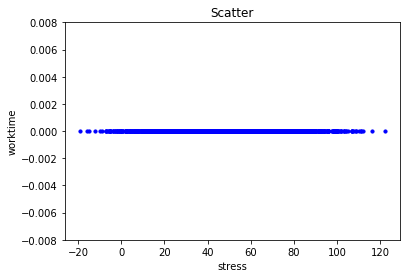

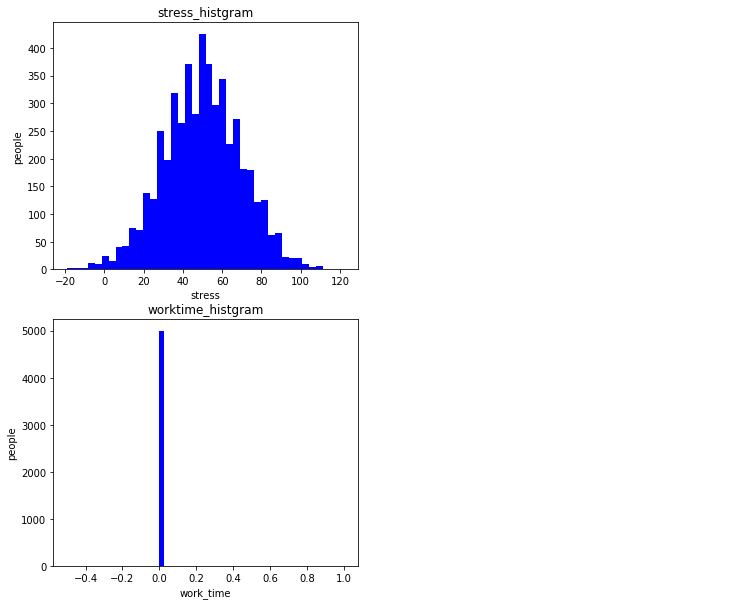

In [30]:
# データフレームにタグを追加
df = df.rename(columns={'年齢': 'ストレス値'})
df = df.assign(月平均残業時間=0)
df = df.assign(在職=1)
df.head(3)

# 任意の偏りを持たせたデータを表示
view_scatter(df)
view_histgram(df)
df.describe()

In [8]:
# 設定した範囲で月平均残業時間を設定
edit_dataframe(df, WORKTIME_INDEX, WORKTIME_MEAN, WORKTIME_STD)

平均値 :50
標準偏差:10
5000件のデータを生成しました。


In [9]:
# 設定した範囲でストレス値を設定
edit_dataframe(df, STRESS_INDEX, STRESS_MEAN, STRESS_STD)

平均値 :50
標準偏差:20
5000件のデータを生成しました。


,連番,ストレス値,月平均残業時間,在職
count,5000.000000,5000.00000,5000.000000,5000.0
mean,2500.500000,49.99320,49.508800,1.0
std,1443.520003,19.75584,10.029957,0.0
min,1.000000,-19.00000,14.000000,1.0
25%,1250.750000,37.00000,43.000000,1.0
50%,2500.500000,50.00000,49.000000,1.0
75%,3750.250000,64.00000,56.000000,1.0
max,5000.000000,122.00000,88.000000,1.0


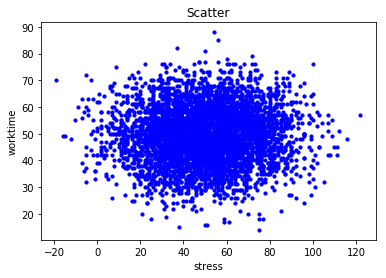

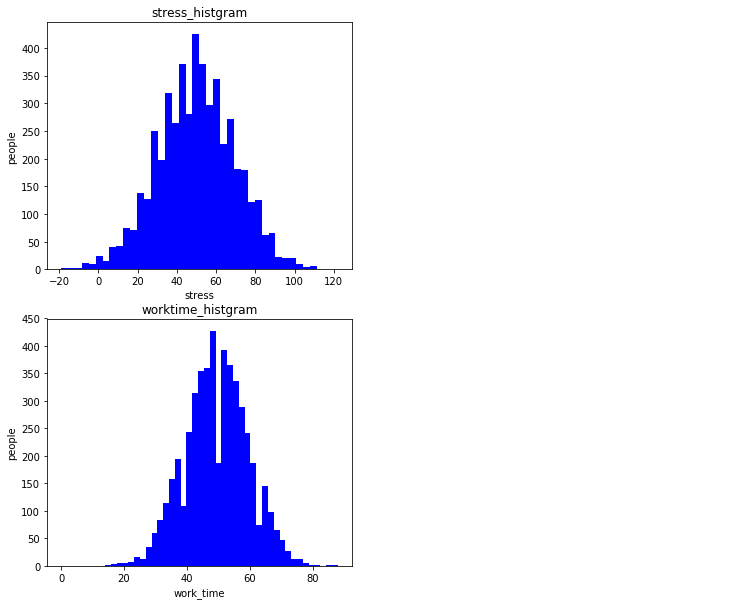

In [10]:
# 任意の偏りを持たせたデータを表示
view_scatter(df)
view_histgram(df)
df.describe()

In [11]:
# 確率で退職させる
retirement(df)

------------------
江藤洋文さんの退職確率は:40.8%です。
退職しました...
------------------
細田穂花さんの退職確率は:10.7%です。
------------------
八木久雄さんの退職確率は:9.4%です。
------------------
小峰良治さんの退職確率は:10.0%です。
退職しました...
------------------
仲田公子さんの退職確率は:41.6%です。
------------------
真田正美さんの退職確率は:7.7%です。
------------------
松岡美羽さんの退職確率は:9.2%です。
------------------
西岡広幸さんの退職確率は:9.9%です。
------------------
南部真桜さんの退職確率は:43.8%です。
------------------
新川楓華さんの退職確率は:11.1%です。
------------------
梅田清治さんの退職確率は:9.5%です。
------------------
村井多紀さんの退職確率は:8.5%です。
------------------
有馬良三さんの退職確率は:10.0%です。
------------------
吉崎桃佳さんの退職確率は:9.9%です。
------------------
浜野政幸さんの退職確率は:44.0%です。
------------------
大木佐太郎さんの退職確率は:9.7%です。
------------------
熊田善之さんの退職確率は:9.6%です。
------------------
荒井美千代さんの退職確率は:9.9%です。
------------------
今西常吉さんの退職確率は:8.4%です。
------------------
高田厚吉さんの退職確率は:8.1%です。
------------------
吉沢康生さんの退職確率は:10.6%です。
------------------
佐野勝美さんの退職確率は:10.8%です。
------------------
角洋翔さんの退職確率は:10.6%です。
------------------
石塚千明さんの退職確率は:9.0%です。
--------

------------------
安井国男さんの退職確率は:9.0%です。
------------------
荻野梢さんの退職確率は:10.3%です。
------------------
成田真吉さんの退職確率は:8.5%です。
------------------
平田歩実さんの退職確率は:8.7%です。
------------------
高梨向日葵さんの退職確率は:9.2%です。
------------------
田淵靖子さんの退職確率は:42.2%です。
------------------
大城彰三さんの退職確率は:8.6%です。
------------------
窪田知代さんの退職確率は:8.9%です。
------------------
河本尚司さんの退職確率は:8.3%です。
------------------
西川美樹子さんの退職確率は:10.2%です。
------------------
福元健志さんの退職確率は:42.0%です。
退職しました...
------------------
高見賢さんの退職確率は:8.3%です。
------------------
二宮凛香さんの退職確率は:47.6%です。
退職しました...
------------------
長谷部勝久さんの退職確率は:9.7%です。
------------------
土肥治志さんの退職確率は:44.4%です。
退職しました...
------------------
久保京香さんの退職確率は:7.8%です。
------------------
野村泰彦さんの退職確率は:9.4%です。
------------------
前原国雄さんの退職確率は:9.3%です。
------------------
村瀬文男さんの退職確率は:9.4%です。
------------------
日野孝次さんの退職確率は:11.2%です。
------------------
高山一子さんの退職確率は:46.0%です。
------------------
鳥居麻緒さんの退職確率は:11.1%です。
------------------
坂上義昭さんの退職確率は:8.0%です。
------------------
今泉進さんの退職確率は:10.8%です。


末吉真悠さんの退職確率は:10.0%です。
------------------
小島政美さんの退職確率は:9.2%です。
------------------
高木堅助さんの退職確率は:45.0%です。
退職しました...
------------------
葛西俊郎さんの退職確率は:8.7%です。
------------------
安川杏子さんの退職確率は:7.9%です。
------------------
安永友紀さんの退職確率は:9.9%です。
------------------
板橋春代さんの退職確率は:9.6%です。
------------------
橋口安弘さんの退職確率は:10.0%です。
------------------
依田可憐さんの退職確率は:10.2%です。
------------------
島本武雄さんの退職確率は:9.7%です。
------------------
高松揚子さんの退職確率は:7.6%です。
------------------
大内譲さんの退職確率は:11.0%です。
------------------
斉藤香奈さんの退職確率は:10.5%です。
------------------
鳥居敬二さんの退職確率は:9.0%です。
------------------
山川重治さんの退職確率は:9.5%です。
------------------
米山恵利さんの退職確率は:41.2%です。
------------------
深田好夫さんの退職確率は:9.6%です。
退職しました...
------------------
日下雅也さんの退職確率は:7.7%です。
------------------
谷川千紗さんの退職確率は:48.8%です。
退職しました...
------------------
小杉美空さんの退職確率は:8.7%です。
------------------
深谷里歌さんの退職確率は:8.9%です。
------------------
梅村香乃さんの退職確率は:49.2%です。
------------------
中嶋小百合さんの退職確率は:9.5%です。
------------------
新保香織さんの退職確率は:7.5%です。
------------------
香

粕谷光さんの退職確率は:7.1%です。
------------------
川瀬司さんの退職確率は:10.1%です。
------------------
藤沢希美さんの退職確率は:9.4%です。
------------------
高島華乃さんの退職確率は:9.7%です。
------------------
羽鳥春子さんの退職確率は:10.4%です。
------------------
長谷川隆吾さんの退職確率は:49.0%です。
------------------
立石志光さんの退職確率は:10.3%です。
------------------
栗田正勝さんの退職確率は:46.4%です。
退職しました...
------------------
齋藤実緒さんの退職確率は:9.4%です。
------------------
松田優那さんの退職確率は:9.2%です。
------------------
志賀久夫さんの退職確率は:45.4%です。
------------------
森下初男さんの退職確率は:9.1%です。
退職しました...
------------------
戸塚夕菜さんの退職確率は:8.1%です。
------------------
山岸沙彩さんの退職確率は:10.8%です。
------------------
河上公彦さんの退職確率は:10.9%です。
------------------
大坪一宏さんの退職確率は:9.0%です。
------------------
豊島文治さんの退職確率は:51.5%です。
退職しました...
------------------
稲村十郎さんの退職確率は:9.8%です。
------------------
高柳静枝さんの退職確率は:8.5%です。
------------------
白鳥福太郎さんの退職確率は:10.1%です。
------------------
向井里咲さんの退職確率は:8.4%です。
------------------
玉城麻友さんの退職確率は:10.3%です。
------------------
藤本日出男さんの退職確率は:10.3%です。
------------------
大沢花楓さんの退職確率は:9.4%です。
----------------

岩間章司さんの退職確率は:51.8%です。
退職しました...
------------------
高木文子さんの退職確率は:43.8%です。
------------------
平林茉莉さんの退職確率は:10.1%です。
------------------
矢部堂下さんの退職確率は:10.2%です。
------------------
植田三平さんの退職確率は:46.6%です。
------------------
福元梨沙さんの退職確率は:9.4%です。
------------------
浅沼道世さんの退職確率は:10.8%です。
------------------
飯田陽治さんの退職確率は:8.3%です。
------------------
武井藤雄さんの退職確率は:51.5%です。
退職しました...
------------------
長谷好美さんの退職確率は:9.5%です。
------------------
稲葉隆雄さんの退職確率は:47.3%です。
退職しました...
------------------
島本一仁さんの退職確率は:8.6%です。
------------------
栗原里香さんの退職確率は:45.2%です。
退職しました...
------------------
乾博美さんの退職確率は:46.4%です。
退職しました...
------------------
大島蒼さんの退職確率は:10.4%です。
退職しました...
------------------
江頭柚衣さんの退職確率は:10.3%です。
------------------
武内圭子さんの退職確率は:9.5%です。
------------------
梶原良夫さんの退職確率は:8.9%です。
------------------
梅沢和枝さんの退職確率は:48.6%です。
------------------
下山正利さんの退職確率は:9.8%です。
------------------
内村実桜さんの退職確率は:8.4%です。
------------------
石渡邦男さんの退職確率は:9.7%です。
------------------
平井幹彦さんの退職確率は:9.1%です。
------------------
橋本美幸さんの退職

増田広吉さんの退職確率は:10.7%です。
------------------
平林光代さんの退職確率は:47.4%です。
退職しました...
------------------
白石雅典さんの退職確率は:48.6%です。
退職しました...
------------------
大坪心菜さんの退職確率は:9.8%です。
------------------
杉浦帆乃香さんの退職確率は:46.7%です。
退職しました...
------------------
牧義之さんの退職確率は:9.9%です。
------------------
谷優月さんの退職確率は:11.5%です。
------------------
板橋十三さんの退職確率は:8.8%です。
------------------
岩本奈穂さんの退職確率は:51.4%です。
退職しました...
------------------
門田仁美さんの退職確率は:8.8%です。
退職しました...
------------------
岩沢栄三さんの退職確率は:45.6%です。
退職しました...
------------------
三村瑞姫さんの退職確率は:6.8%です。
------------------
小久保比呂さんの退職確率は:43.4%です。
------------------
永瀬清次郎さんの退職確率は:10.0%です。
------------------
大島唯菜さんの退職確率は:10.0%です。
------------------
小野田真尋さんの退職確率は:8.3%です。
------------------
荻原紗那さんの退職確率は:44.4%です。
退職しました...
------------------
大江幸子さんの退職確率は:10.9%です。
------------------
丸田優奈さんの退職確率は:5.8%です。
------------------
外山司郎さんの退職確率は:10.2%です。
------------------
平本勇三さんの退職確率は:9.9%です。
------------------
赤羽正博さんの退職確率は:10.2%です。
------------------
小宮響さんの退職確率は:9.4%です。
--------------

------------------
大林和雄さんの退職確率は:9.3%です。
------------------
三田比呂美さんの退職確率は:10.7%です。
------------------
田渕満夫さんの退職確率は:44.6%です。
退職しました...
------------------
畠山慶一さんの退職確率は:8.5%です。
------------------
唐沢詩音さんの退職確率は:11.3%です。
------------------
日下重一さんの退職確率は:8.2%です。
------------------
坂元秋友さんの退職確率は:10.1%です。
------------------
松下亜美さんの退職確率は:10.8%です。
------------------
岩田阿澄さんの退職確率は:9.1%です。
------------------
柳原亜美さんの退職確率は:10.8%です。
------------------
土井英二さんの退職確率は:9.1%です。
------------------
片桐円香さんの退職確率は:9.6%です。
------------------
田村結羽さんの退職確率は:9.9%です。
------------------
岩渕美香さんの退職確率は:44.8%です。
退職しました...
------------------
熊田貞行さんの退職確率は:46.6%です。
------------------
三原結さんの退職確率は:8.6%です。
------------------
黒沢玲さんの退職確率は:9.9%です。
------------------
永瀬裕子さんの退職確率は:48.1%です。
------------------
植松杏奈さんの退職確率は:11.6%です。
------------------
細田紗久子さんの退職確率は:50.1%です。
------------------
三木夏子さんの退職確率は:10.1%です。
------------------
北村由香さんの退職確率は:8.5%です。
------------------
北尾睦夫さんの退職確率は:8.4%です。
------------------
諏訪琴美さんの退職確率は:11.4%です。
-------

退職しました...
------------------
伏見里菜さんの退職確率は:43.4%です。
------------------
大久保瑠璃さんの退職確率は:9.9%です。
------------------
土肥瑠愛さんの退職確率は:8.9%です。
------------------
稲田泉さんの退職確率は:10.1%です。
------------------
瀬尾宗男さんの退職確率は:44.6%です。
------------------
若松比呂美さんの退職確率は:8.5%です。
------------------
岡部寅雄さんの退職確率は:7.9%です。
------------------
三浦真澄さんの退職確率は:41.6%です。
------------------
松村里菜さんの退職確率は:45.6%です。
------------------
広田俊二さんの退職確率は:8.5%です。
退職しました...
------------------
鮫島義昭さんの退職確率は:40.6%です。
退職しました...
------------------
河上秀吉さんの退職確率は:9.8%です。
退職しました...
------------------
西田奈菜さんの退職確率は:10.5%です。
------------------
本橋裕仁さんの退職確率は:47.6%です。
------------------
梶原正信さんの退職確率は:10.4%です。
------------------
藤巻怜奈さんの退職確率は:9.1%です。
------------------
米倉松雄さんの退職確率は:8.3%です。
退職しました...
------------------
森谷由夫さんの退職確率は:9.8%です。
------------------
山下実希子さんの退職確率は:10.6%です。
------------------
田代清二さんの退職確率は:7.3%です。
------------------
小玉尚三さんの退職確率は:9.9%です。
------------------
那須康之さんの退職確率は:50.4%です。
退職しました...
------------------
松田徳美さんの退職確率は:10.7%です。
------

退職しました...
------------------
畠中和佳子さんの退職確率は:9.3%です。
------------------
奥野理仁さんの退職確率は:45.9%です。
------------------
松浦麻由さんの退職確率は:10.2%です。
------------------
岩谷愛理さんの退職確率は:8.4%です。
------------------
松井義光さんの退職確率は:10.1%です。
------------------
服部泉さんの退職確率は:10.4%です。
------------------
小峰陽さんの退職確率は:10.0%です。
------------------
菅原寿さんの退職確率は:10.4%です。
------------------
脇田由紀子さんの退職確率は:11.3%です。
退職しました...
------------------
雨宮末男さんの退職確率は:47.6%です。
------------------
紺野博信さんの退職確率は:9.3%です。
退職しました...
------------------
深谷咲月さんの退職確率は:8.5%です。
------------------
小久保沙良さんの退職確率は:9.9%です。
------------------
矢沢華凛さんの退職確率は:10.6%です。
------------------
村松優仁さんの退職確率は:10.8%です。
------------------
前川結奈さんの退職確率は:8.6%です。
------------------
徳田沙也香さんの退職確率は:10.3%です。
退職しました...
------------------
鹿野善吉さんの退職確率は:44.8%です。
------------------
粕谷梨央さんの退職確率は:11.6%です。
------------------
服部祐二さんの退職確率は:10.6%です。
------------------
永井恵三さんの退職確率は:11.8%です。
------------------
滝孝之さんの退職確率は:45.8%です。
------------------
長岡良子さんの退職確率は:8.7%です。
------------------
平原章子さ

増田美央さんの退職確率は:9.2%です。
------------------
安斉晴久さんの退職確率は:8.9%です。
------------------
森脇空さんの退職確率は:7.1%です。
------------------
町田里沙さんの退職確率は:10.5%です。
------------------
椎名莉那さんの退職確率は:9.6%です。
------------------
飛田美保さんの退職確率は:8.7%です。
------------------
正木正敏さんの退職確率は:9.5%です。
退職しました...
------------------
松下唯菜さんの退職確率は:8.5%です。
------------------
横井年子さんの退職確率は:42.4%です。
------------------
植松敏哉さんの退職確率は:7.8%です。
------------------
小室紗和さんの退職確率は:8.1%です。
------------------
本多裕紀さんの退職確率は:9.4%です。
------------------
村田敏雄さんの退職確率は:7.4%です。
------------------
上田清三さんの退職確率は:9.1%です。
------------------
日比野柚花さんの退職確率は:10.0%です。
------------------
斎藤慶子さんの退職確率は:42.6%です。
------------------
後藤重吉さんの退職確率は:8.2%です。
退職しました...
------------------
大熊凪さんの退職確率は:8.2%です。
------------------
土肥碧希さんの退職確率は:10.8%です。
------------------
山村綾子さんの退職確率は:45.8%です。
退職しました...
------------------
栗林直治さんの退職確率は:41.4%です。
------------------
須田実咲さんの退職確率は:9.0%です。
------------------
関谷昭吾さんの退職確率は:8.7%です。
------------------
吉川沙耶香さんの退職確率は:46.2%です。
------------------
瀬尾

芳賀華さんの退職確率は:12.4%です。
------------------
田口美春さんの退職確率は:7.6%です。
------------------
浜本成良さんの退職確率は:9.0%です。
------------------
中澤公一さんの退職確率は:44.6%です。
------------------
岩城咲希さんの退職確率は:9.1%です。
------------------
渡辺康雄さんの退職確率は:48.6%です。
退職しました...
------------------
平井奈美さんの退職確率は:9.8%です。
------------------
宮崎勝義さんの退職確率は:9.2%です。
------------------
高崎雪絵さんの退職確率は:53.7%です。
------------------
荻野奈菜さんの退職確率は:45.4%です。
------------------
小澤茂子さんの退職確率は:10.1%です。
------------------
坂東花奈さんの退職確率は:10.0%です。
退職しました...
------------------
三沢康弘さんの退職確率は:8.5%です。
------------------
江成喜八郎さんの退職確率は:9.0%です。
退職しました...
------------------
矢沢範久さんの退職確率は:50.8%です。
退職しました...
------------------
若林幸太郎さんの退職確率は:8.1%です。
------------------
海野日菜子さんの退職確率は:45.2%です。
------------------
西川紀夫さんの退職確率は:10.2%です。
------------------
阿久津義一さんの退職確率は:10.6%です。
------------------
横井芳人さんの退職確率は:45.3%です。
退職しました...
------------------
三谷秀加さんの退職確率は:8.8%です。
------------------
松元兼吉さんの退職確率は:8.8%です。
------------------
大林佳代子さんの退職確率は:8.5%です。
------------------
玉木詩乃さんの退職確率は:7

岩田敏之さんの退職確率は:11.0%です。
------------------
武内絢音さんの退職確率は:44.8%です。
------------------
石山早苗さんの退職確率は:9.5%です。
------------------
陳利忠さんの退職確率は:9.9%です。
------------------
有田直行さんの退職確率は:10.9%です。
------------------
瀬戸依子さんの退職確率は:11.5%です。
------------------
金子円美さんの退職確率は:7.3%です。
------------------
杉田柚季さんの退職確率は:10.0%です。
------------------
松崎徳康さんの退職確率は:7.1%です。
------------------
金野志織さんの退職確率は:9.7%です。
------------------
重田隆志さんの退職確率は:10.9%です。
------------------
曽我朱音さんの退職確率は:8.4%です。
------------------
白井結愛さんの退職確率は:8.0%です。
------------------
奈良百華さんの退職確率は:9.8%です。
退職しました...
------------------
沢村連人さんの退職確率は:8.8%です。
------------------
金井有紗さんの退職確率は:7.3%です。
------------------
小暮陽花さんの退職確率は:9.7%です。
------------------
大田高志さんの退職確率は:10.7%です。
退職しました...
------------------
石原広吉さんの退職確率は:8.7%です。
------------------
外山優月さんの退職確率は:45.0%です。
退職しました...
------------------
石坂和馬さんの退職確率は:10.7%です。
------------------
今正元さんの退職確率は:10.1%です。
------------------
野口行雄さんの退職確率は:8.0%です。
------------------
松村英樹さんの退職確率は:8.7%です。
------------------
野原

平尾瑞希さんの退職確率は:10.2%です。
------------------
沢井朝子さんの退職確率は:8.9%です。
------------------
高沢奈央さんの退職確率は:9.6%です。
------------------
雨宮美玲さんの退職確率は:10.2%です。
------------------
河口昌己さんの退職確率は:10.8%です。
------------------
多田保夫さんの退職確率は:9.6%です。
------------------
池上雅宣さんの退職確率は:9.6%です。
------------------
森谷麻衣さんの退職確率は:9.0%です。
------------------
浦野裕美子さんの退職確率は:52.1%です。
------------------
園田紗菜さんの退職確率は:9.3%です。
------------------
古田澪さんの退職確率は:8.0%です。
------------------
江頭友子さんの退職確率は:9.6%です。
------------------
小川一三さんの退職確率は:10.2%です。
------------------
稲田彩希さんの退職確率は:52.7%です。
退職しました...
------------------
神谷政人さんの退職確率は:9.7%です。
------------------
高畑明日香さんの退職確率は:47.2%です。
退職しました...
------------------
本多昌己さんの退職確率は:48.6%です。
------------------
長谷部佑奈さんの退職確率は:10.1%です。
------------------
長谷節男さんの退職確率は:52.6%です。
退職しました...
------------------
高野文香さんの退職確率は:47.8%です。
退職しました...
------------------
米沢美幸さんの退職確率は:52.7%です。
退職しました...
------------------
芦田正道さんの退職確率は:10.7%です。
------------------
新保昌弘さんの退職確率は:9.9%です。
------------------
武内茉莉さんの退職確率は:54

下山由実さんの退職確率は:11.0%です。
------------------
菅沼龍一さんの退職確率は:10.2%です。
------------------
風間紗季さんの退職確率は:8.5%です。
------------------
村田晴子さんの退職確率は:9.8%です。
------------------
坂井正治さんの退職確率は:9.8%です。
------------------
岩間光義さんの退職確率は:8.8%です。
------------------
丹羽綾香さんの退職確率は:8.3%です。
------------------
岩佐結依さんの退職確率は:10.5%です。
------------------
大石莉緒さんの退職確率は:9.7%です。
------------------
堀越和明さんの退職確率は:48.8%です。
退職しました...
------------------
米倉想太さんの退職確率は:11.2%です。
退職しました...
------------------
長島佑奈さんの退職確率は:10.0%です。
------------------
平清茂さんの退職確率は:10.0%です。
------------------
西原智恵さんの退職確率は:8.0%です。
------------------
小椋沙耶さんの退職確率は:9.9%です。
------------------
風間仁美さんの退職確率は:8.9%です。
------------------
寺本正三郎さんの退職確率は:45.2%です。
------------------
坂口一華さんの退職確率は:9.8%です。
------------------
奥忠良さんの退職確率は:9.8%です。
------------------
藤本好さんの退職確率は:10.5%です。
------------------
矢吹賢治さんの退職確率は:49.8%です。
退職しました...
------------------
岩佐愛実さんの退職確率は:10.2%です。
------------------
大浦雅宣さんの退職確率は:8.5%です。
------------------
大畑亀吉さんの退職確率は:10.1%です。
------------------


高岡政志さんの退職確率は:43.4%です。
退職しました...
------------------
高梨和さんの退職確率は:49.2%です。
------------------
尾上愛美さんの退職確率は:9.9%です。
------------------
新川秋男さんの退職確率は:11.3%です。
------------------
村瀬沙彩さんの退職確率は:11.1%です。
------------------
寺島倫子さんの退職確率は:9.1%です。
------------------
長谷川和歌子さんの退職確率は:9.7%です。
------------------
井出正平さんの退職確率は:46.0%です。
------------------
大和田義久さんの退職確率は:10.1%です。
------------------
宍戸博史さんの退職確率は:10.2%です。
------------------
江崎紗羽さんの退職確率は:8.9%です。
------------------
石渡靖さんの退職確率は:9.2%です。
------------------
飯島凜さんの退職確率は:9.1%です。
------------------
大高心さんの退職確率は:46.4%です。
------------------
梅原一正さんの退職確率は:8.8%です。
------------------
畑中武司さんの退職確率は:9.3%です。
------------------
佐竹絵里さんの退職確率は:11.0%です。
------------------
秋元伸浩さんの退職確率は:8.6%です。
退職しました...
------------------
布施明仁さんの退職確率は:9.6%です。
------------------
関優依さんの退職確率は:47.7%です。
------------------
笠井柑奈さんの退職確率は:49.5%です。
------------------
志村亜衣さんの退職確率は:7.9%です。
------------------
清水也さんの退職確率は:48.9%です。
------------------
堤葵衣さんの退職確率は:10.0%です。
------------------
小幡金吾さんの退職確率

------------------
児島昌二さんの退職確率は:9.0%です。
------------------
相田謙二さんの退職確率は:10.6%です。
------------------
真鍋優菜さんの退職確率は:8.4%です。
------------------
宮島武裕さんの退職確率は:8.2%です。
------------------
柴田優華さんの退職確率は:10.8%です。
------------------
越智静枝さんの退職確率は:9.6%です。
------------------
松永春香さんの退職確率は:8.4%です。
------------------
沼田孝通さんの退職確率は:8.5%です。


,連番,ストレス値,月平均残業時間,在職
count,5000.000000,5000.00000,5000.000000,5000.00000
mean,2500.500000,49.99320,49.508800,0.81320
std,1443.520003,19.75584,10.029957,0.38979
min,1.000000,-19.00000,14.000000,0.00000
25%,1250.750000,37.00000,43.000000,1.00000
50%,2500.500000,50.00000,49.000000,1.00000
75%,3750.250000,64.00000,56.000000,1.00000
max,5000.000000,122.00000,88.000000,1.00000


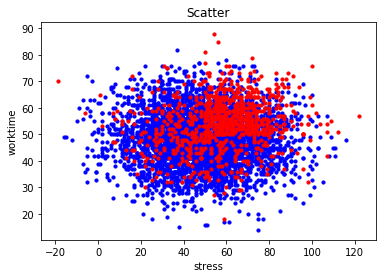

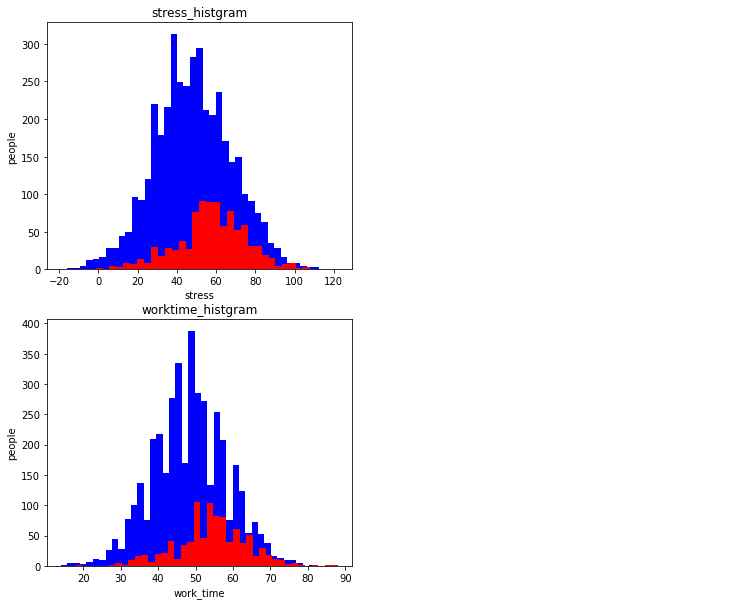

In [12]:
# 確率で退職させたデータを表示
view_scatter(df)
view_histgram(df)
df.describe()

In [13]:
# ------------------------------------------------------------------------
# ロジスティック回帰分析を行う
# 目的変数：在職(1 or 0)
# 説明変数：勤務時間とストレス値

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import pickle

# ロジスティック回帰分析用のデータフレーム
logistic_df = df

# 学習モデルの保存先
LOGISTIC_MODEL = "./Data/LogisticModel.sav"
USE_LOGISTIC_MODEL = True

In [14]:
def plot_regions(clf, X, y):
    """ モデルが学習した領域をプロット """
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.3),
                           np.arange(x2_min, x2_max, 0.3))

    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')

In [15]:
tr_df , test_df  = train_test_split(logistic_df, test_size=0.3)
tr_df.head(3)

,連番,氏名,氏名（カタカナ）,性別,ストレス値,月平均残業時間,在職
3985,3986,瀬川敏仁,セガワトシヒト,男,19,48,1
4068,4069,松山友吉,マツヤマトモヨシ,男,24,29,1
4170,4171,山岸政美,ヤマギシマサミ,女,55,53,0


In [16]:
test_df.head(3)

,連番,氏名,氏名（カタカナ）,性別,ストレス値,月平均残業時間,在職
696,697,堀田武治,ホッタタケジ,男,38,46,1
4608,4609,北川虎湊,キタガワコナト,男,38,53,0
1049,1050,高野満里奈,タカノマリナ,女,58,37,1


In [17]:
# 説明変数の読み込み
X_train = tr_df[['ストレス値', '月平均残業時間']].values
# 目的変数の読み込み
y_train = tr_df['在職'].values

In [18]:
# ロジスティック回帰モデルの作成
if USE_LOGISTIC_MODEL:
    try:
        lr = pickle.load(open(LOGISTIC_MODEL, 'rb'))
    except Exception as e:
        lr = LogisticRegression(C=1000, random_state=0)
else:
    lr = LogisticRegression(C=1000, random_state=0)

In [19]:
# 学習させる
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# テストデータの読み込み
X_test = test_df[['ストレス値', '月平均残業時間']].values
y_test = test_df['在職'].values

# 作成したモデルを元にした予測の実行
predict = lr.predict(X_test)

# 結果の出力
print('---------- LogisticRegression ------------')
print("正解率(Accuracy):", '{:.2f}'.format(accuracy_score(y_test, predict)*100),"%",  sep="")
print("適合率(Precsion):", '{:.2f}'.format(precision_score(y_test, predict)*100),"%",  sep="")
print("再現率（Recall）:", '{:.2f}'.format(recall_score(y_test, predict)*100),"%",  sep="")

---------- LogisticRegression ------------
正解率(Accuracy):81.13%
適合率(Precsion):81.81%
再現率（Recall）:98.60%


In [21]:


def plot_regions(clf, X, y):
    """ モデルが学習した領域をプロット """
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.3),
                           np.arange(x2_min, x2_max, 0.3))

    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')
    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    


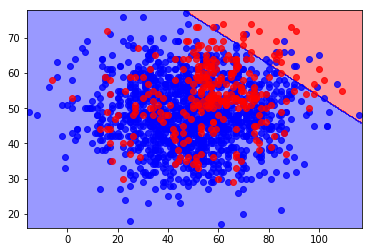

In [22]:
plot_regions(lr, X_test, y_test);

In [23]:
# ------------------------------------------------------------------------
# ロジスティック回帰分析を行う
# 目的変数：在職(1 or 0)
# 説明変数：勤務時間とストレス値

from sklearn.svm import SVC


# 学習モデルの保存先
SVC_MODEL = "./Data/SVC.sav"
USE_SVC_MODEL = True

In [24]:
# ロジスティック回帰モデルの作成
if USE_SVC_MODEL:
    try:
        lr = pickle.load(open(SVC_MODEL, 'rb'))
    except Exception as e:
        svm = SVC()
else:
    svm = SVC()

In [25]:
# SVCモデルに学習させる
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
svc_predict = svm.predict(X_test)

print('---------- SVC ------------')
print("正解率(Accuracy):", '{:.2f}'.format(accuracy_score(y_test, svc_predict)*100),"%",  sep="")
print("適合率(Precsion):", '{:.2f}'.format(precision_score(y_test, svc_predict)*100),"%",  sep="")
print("再現率（Recall）:", '{:.2f}'.format(recall_score(y_test, svc_predict)*100),"%",  sep="")

---------- SVC ------------
正解率(Accuracy):79.87%
適合率(Precsion):81.61%
再現率（Recall）:96.95%


In [27]:
def plot_regions_svc(clf, X, y):
    xx1, xx2 = np.meshgrid(np.arange(0, 12, 0.1),
                           np.arange(0, 12, 0.1))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')
    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')

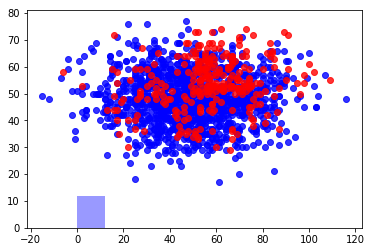

In [28]:
plot_regions_svc(svm, X_test, y_test);

In [29]:
# ------------------------------------------------------------------------
# ロジスティック回帰分析を行う
# 目的変数：在職(1 or 0)
# 説明変数：勤務時間とストレス値

from sklearn.svm import SVC


# 学習モデルの保存先
LOGISTIC_MODEL = "./Data/SVC.sav"
USE_SVC_MODEL = False